In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
data = pd.read_stata("stata/GSS7218_R2.DTA", convert_categoricals=False) #

In [36]:
data.columns

Index(['year', 'id', 'wrkstat', 'hrs1', 'hrs2', 'evwork', 'occ', 'prestige',
       'wrkslf', 'wrkgovt',
       ...
       'neisafe', 'rlooks', 'rgroomed', 'rweight', 'rhlthend', 'wtss',
       'wtssnr', 'wtssall', 'vstrat', 'vpsu'],
      dtype='object', length=6109)

In [26]:
sr = pd.io.stata.StataReader("stata/GSS7218_R2.DTA")
vl = sr.value_labels()
sr.close()

In [33]:
vl.keys()

dict_keys(['LABA', 'HRS1', 'HRS2', 'LABB', 'LABC', 'LABD', 'WRKGOVT', 'COMMUTE', 'OCC80', 'LABE', 'INDUS07', 'OCCONET', 'FOUND', 'LABF', 'OCCINDV', 'OCCSTATU', 'OCCTAG', 'PRESTG10', 'V24_A', 'LABG', 'INDSTATU', 'INDTAG', 'MARITAL', 'MARTYPE', 'LABH', 'SPHRS1', 'SPHRS2', 'COWRKSTA', 'COWRKSLF', 'COEVWORK', 'LABI', 'SPOCC80', 'SPOCC10', 'SPOCCIND', 'SPOCCSTA', 'SPOCCTAG', 'SPPRES10', 'V54_A', 'SPIND10', 'SPINDSTA', 'SPINDTAG', 'PAOCC16', 'PAIND16', 'PAOCC80', 'PAOCC10', 'PAOCCIND', 'PAOCCSTA', 'PAOCCTAG', 'PAPRES10', 'V72_A', 'PAIND10', 'PAINDSTA', 'PAINDTAG', 'MAOCC80', 'MAOCC10', 'MAOCCIND', 'MAOCCSTA', 'MAOCCTAG', 'MAPRES10', 'V85_A', 'MAIND10', 'MAINDSTA', 'MAINDTAG', 'LABJ', 'CHILDS', 'AGE', 'LABK', 'COEDUC', 'CODEG', 'LABL', 'MAJOR1', 'MAJOR2', 'DIPGED', 'LABM', 'COSECTOR', 'LABN', 'LABO', 'LABP', 'LABQ', 'LABR', 'LABS', 'VOEDNME1', 'VOEDNME2', 'COBARATE', 'COGRADTO', 'COEFTOTL', 'SEX', 'RACE', 'RES16', 'REG16', 'MOBILE16', 'FAMILY16', 'FAMDIF16', 'INCOM16', 'PARBORN', 'GRANBORN', 

In [34]:
sub_vl = [key for key in vl if "LAB" in key]

In [45]:
sub_vl2 = [k for k in vl if k.lower() in data.columns]
not_vl = [k for k in vl if not k.lower() in data.columns]
col_not_vl = [c for c in data.columns if c.upper() not in vl]

In [47]:
print(len(sub_vl2))
print(len(vl))
print(len(col_not_vl))
print(not_vl)

1396
2015
4713
['LABA', 'LABB', 'LABC', 'LABD', 'LABE', 'LABF', 'OCCSTATU', 'V24_A', 'LABG', 'INDSTATU', 'LABH', 'LABI', 'SPOCCIND', 'SPOCCSTA', 'V54_A', 'SPINDSTA', 'PAOCCIND', 'PAOCCSTA', 'V72_A', 'PAINDSTA', 'MAOCCIND', 'MAOCCSTA', 'V85_A', 'MAINDSTA', 'LABJ', 'LABK', 'LABL', 'LABM', 'LABN', 'LABO', 'LABP', 'LABQ', 'LABR', 'LABS', 'COGRADTO', 'COEFTOTL', 'LABT', 'LABU', 'LABV', 'LABW', 'LABX', 'LABY', 'LABZ', 'LABAA', 'LABAB', 'LABAC', 'LABAD', 'LABAE', 'LABAF', 'LABAG', 'LABAH', 'LABAI', 'LABAJ', 'LABAK', 'LABAL', 'LABAM', 'LABAN', 'LABAO', 'LABAP', 'LABAQ', 'LABAR', 'LABAS', 'LABAT', 'LABAU', 'LABAV', 'LABAW', 'LABAX', 'LABAY', 'LABAZ', 'LABBA', 'LABBB', 'LABBC', 'LABBD', 'LABBE', 'LABBF', 'LABBG', 'LABBH', 'LABBI', 'LABBJ', 'LABBK', 'LABBL', 'LABBM', 'LABBN', 'LABBO', 'LABBP', 'LABBQ', 'LABBR', 'LABBS', 'LABBT', 'LABBU', 'LABBV', 'LABBW', 'LABBX', 'LABBY', 'LABBZ', 'LABCA', 'LABCB', 'LABCC', 'LABCD', 'LABCE', 'LABCF', 'LABCG', 'LABCH', 'LABCI', 'LABCJ', 'LABCK', 'LABCL', 'LABCM',

In [31]:
data.head()

,year,id,wrkstat,hrs1,hrs2,evwork,occ,prestige,wrkslf,wrkgovt,...,neisafe,rlooks,rgroomed,rweight,rhlthend,wtss,wtssnr,wtssall,vstrat,vpsu
0,1972,1,1.0,NaN,NaN,NaN,205.0,50.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.4446,NaN,NaN
1,1972,2,5.0,NaN,NaN,1.0,441.0,45.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.8893,NaN,NaN
2,1972,3,2.0,NaN,NaN,NaN,270.0,44.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.8893,NaN,NaN
3,1972,4,1.0,NaN,NaN,NaN,1.0,57.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.8893,NaN,NaN
4,1972,5,7.0,NaN,NaN,1.0,385.0,40.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.8893,NaN,NaN


In [4]:
data.head()

,year,id,wrkstat,hrs1,hrs2,evwork,occ,prestige,wrkslf,wrkgovt,...,neisafe,rlooks,rgroomed,rweight,rhlthend,wtss,wtssnr,wtssall,vstrat,vpsu
0,1972,1,1.0,NaN,NaN,NaN,205.0,50.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.4446,NaN,NaN
1,1972,2,5.0,NaN,NaN,1.0,441.0,45.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.8893,NaN,NaN
2,1972,3,2.0,NaN,NaN,NaN,270.0,44.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.8893,NaN,NaN
3,1972,4,1.0,NaN,NaN,NaN,1.0,57.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.8893,NaN,NaN
4,1972,5,7.0,NaN,NaN,1.0,385.0,40.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.8893,NaN,NaN


In [9]:
data['year'].unique()

array([1972, 1973, 1974, 1975, 1976, 1977, 1978, 1980, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1993, 1994, 1996, 1998,
       2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018],
      dtype=int64)

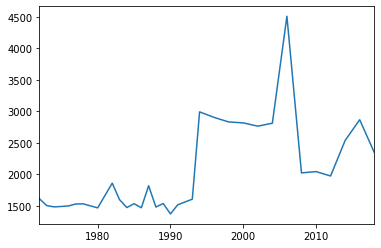

In [18]:
data['year'].value_counts().sort_index().plot()
plt.show()